In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Machine Learning Foundation

## Section 1, Part e: Hypothesis Testing 

## Objectives: 

After this discussion, you should be able to: 
* Know the difference between a null and alternative hypothesis
* Write your own set of hypotheses for testing

In [1]:
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats # Questa libreria ci serve per effettuare analisi statistiche
import math             # Importiamo anche math per avere suporto per alcune operazioni matematiche

Populating the interactive namespace from numpy and matplotlib


## Problema

Dico di avere delle abilità mistiche tramite le quali riesco a predire i risultati del lancio di una moneta.

Tu non pensi che io abbia questi poteri.

Come possiamo testarlo?

Facciamo un esperimento in cui lanciamo la moneta 100 volte. Io indovino 57 lanci.

Sono speciale oppure no?

--- 

### Determining the Null and Alternative Hypothesis

Write the null and alternative hypotheses!

Null: 

Alternative:  

**Ipotesi Nulla:** Non sei speciale. Questo implica che non hai i poteri psichici e quindi la tua probabilità di indovinare il risultato di un lancio di moneta è dello 0,5 come tutti. Ma anche sotto questa ipotesi, rimane il fatto che ne hai indovinato 57 su 100 lanci. Quinsi, sei stato fortunato per un caso fortuito o sei veramente un mago? Quindi diciamo un po il dubbio mi rimane.

**Ipotesi Alternativa:**  Alternativamente, io sono un mago. Se lo sono significa che riesco ad indovinare il risultato di un lancio con una probabilità superiore allo 0,5 rispetto alle persone comuni.

La cosa che stiamo misurando dall'esperimento, o **test di prova**, è il *numero di lanci predetti correttamente su 100 lanci effettuati.*


---

Se l'ipotesi nulla è corretta, il test di prova ha una distribuzione di tipo binomiale, con parametri `n = 100` e `p = 0.5`. Cioè se ripetiamo l'esperimento molte volte e teniamo traccia dei risultati, i risultati formano una distribuzione binomiale.

Dunque, se l'ipotesi nulla è corretta, quanto verosimilmente è che io preveda 57 o più lanci corretti?

Prima di verificare (in realtà, prima ancora di fare l'esperimento) decidiamo cosa ci potrà convincere sul fatto che tu non abbia dei poteri psichici. La scelta di un valore di cutoff del 5% è quella più comune come best practice. Cioè, se vediamo dei risultati così estremi come 57 tiri indovinati su 100 meno del 5% delle volte, diciamo che è molto improbabile che l'ipotesi nulla sia vera.

---
abbiamo due risultati, uno con probabilità (p) e l'altro con probabilità (1-p) di accadere, quindi abbiamo tutti gli elementi per usare una [distribuzione](http://mathworld.wolfram.com/BinomialDistribution.html) [binomiale](https://en.wikipedia.org/wiki/Binomial_distribution) per questa analisi.

Nel caso di una distribuzione binomiale, che è discreta e non troppo complessa matematicamente, possiamo semplicemente calcolare la probabilità. Ma in generale faremo affidamento su alcune funzionalità esistenti. (Nei corsi di statistica tradizionali, sarebbe la parte dove guardiamo le ultime tavole del libro per consultare dei valori noti).


In [13]:
from scipy.stats import binom
prob = 1 - binom.cdf(57, 100, 0.5)

print(str(round(prob*100, 1))+"%")

6.7%


La probabilità di ottenere 57 o più lanci indovinati è dello 6.7%. Qusto è più di 5%, quindi non possiamo rigettare l'ipotesi nulla e concludere che probabilmente non hai poteri psichici.

Nota: Per calcolare la probabilità di ottenere 57 o più lanci corretti è stata calcolata facendo uso della CDF ovvero della cumulative distribuition function (funzione di distribuzione cumulativa). Come abbiamo visto corrisponde ad una sommatoria di probabilità. Scrivere 1-binom.cdf( etc... significa proprio 57 o più lanci indvinati.

---

Al contrario, possiamo stabilire il valore del cutoff del 95% in anticipo.

--- 

### Esercizio

Trova il numero di lanci di moneta che sono richiesti ad una persona di indovinare per farci credere che sono dei chiaroveggenti.
 

---

In [12]:
from scipy.stats import binom
print(binom.ppf(0.95,100,0.5)+1)

59.0



Usiamo la funzione ppt. Dato che abbiamo impostato un valore di cutoff del 5% ovvero, tutti quei valori per cui si ha 5% di probabilità o meno di accadere diciamo che abbiamo i poteri psichici, si conclude che c'è un punto a sinistra per il quale tutti i valori hnno il 95% o più di probabilità di accadere. Noi vogliamo sapere esattamente a quanti lanci di moneta corrisponde questo punto.


|------*95%*---------**59**---------*5%*-------|

|-----...-55-56-57-58-**59**-60-61-62-63-...-----100|


Questo signifia che una perona debba indovinare 59 lanci o più per essere considerato chiaroveggente. E diremo che quella persona h aun potere predittivo con un livello di confidenza del 95%

---

## Una affermazione più specifica

Sin qui tutto ok. Ma se invece avessi detto, " non sono perfetto, ma posso predire i lanci di monete il 60% delle volte. Che è ancora buono"

Cosa facciamo in questo caso? Sicuramente potremmo procedere come abbiamo fatto prima, e quando predico 57 volte, posso rigettare la mia affermazione.

Ma se dicessi, "Aspetta un minuto. Ho detto 60 e ne ho indovinati 57, a me sembra buono comunque".


Interpretation:
> "Sembra che oggi non è il mio giorno fortunato, e questo è il motivo del perchè i miei risultati non sono statisticamente significativi!"

Cosa rispondiamo a quest? Il problema qui è che non c'è più una singola ipotesi nulla che possiamo approvare o rigettare. Invece, **abbiamo due ipotesi contendenti**
    * Ipotesi A: Non c'è potere predittivo 
    * Ipotesi B: C'è il 60% di potere predittivo

Ognuna di queste ipotesi è una curva normale, la prima centrata intorno al 50% e la seconda intorno al 60%


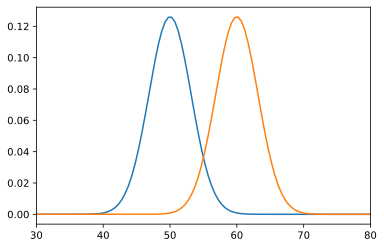

In [14]:
mu = 50 #media del 50% per la prima curva, ovvero dove è il centro della distribuzione A
variance = 10 # settiamo una varianza di 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60 50 #media del 60% per la prima curva, ovvero dove è il centro della distribuzione B
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma)) # Per la y diamo come valori la probabilità di ottenere il valore x
# corrispondente. Ci riusciamo usando pdf (probability density function nel punto x)

plt.xlim(30,80)
plt.show()

**E 57 lanci indovinati correttamente ccadono all'interno del 95% di confidenza di entrambe le curve.**

In [15]:
print (1 - binom.cdf(57, 100, 0.5))
print (binom.cdf(57, 100, 0.6))

0.06660530960360678
0.3032601298434453


Cosa facciamo adesso? Non ci sono abbastanza dati per ottenere un livello di confidenza del 95%. Ci sono poce cose che possiamo fare.

### 1) Abbassiamo la confidenza

Dato che abbiamo una affermazione al 50 e 60, possiamo prendere un punto ametà strada, 55. Possiamo dire che se predico oltre 55, allora ho dei poteri psichici. Questo significherebbe che abbiamo abbassato il livello di confidenza.

In [16]:
print (1 - binom.cdf(55, 100, 0.5)) # probabilità di indovinare 55 tiri o più
print (binom.cdf(54, 100, 0.6)) # probabilità di indovinare 54 tiri o meno

0.1356265120369171
0.13109045261974842


** Ad un livello di confidenza dell'87%, possiamo dire che ho dei poteri predittivi, dato che ho ottenuto 57 tiri corretti.**
Non è ideale; abbiamo preso un numero che è soggetto ad avere un bias piuttosto che un intervallo di confidenza.
 

### 2) Datti un bias

Ma non è necessario che applichiamo un bias uguale alle due ipotesi per prendere il punto medio come abbiamo fatto. Il punto di cut-off potrebbe essere ovunque. Al momento, i nostri margini di errore sono pari. La probabilità che qualcuno abbia un potere predittivo e che noi diciamo che non è vero è del 13% e la probabilità che qualcuno non abbia un potere predittivo e noi diciamo di si, è lo stesso del 13%. Come cambiamo il cutoff, un errore va giù e l'altro sale.

Per esempio, se ci manteniamo sul 95% originale e una moneta regolare:
 

In [18]:
binom.ppf(0.95, 100, 0.5) #Questa è l'inversa delle funzioni cdf viste sopra

58.0

Allora il nosto cutoff è 58. I nostri due errori saranno:

In [22]:
print (1-binom.cdf(58, 100, 0.5))
print (binom.cdf(58, 100, 0.6))

0.04431304005703374
0.3774673238778277


5% di probabilità che qualuno ha nessun potere e diciamo li abbia. Ma la probabilità che qualcuno abbia dei poteri predittivi e che noi diciamo di no è salita al 38%. Questi due errori sono chiamati errore di Tipo 1 ed errore di Tipo 2. E noi abbiamo la scelta di poter tendere di più verso l'uno o verso l'altro.

### 3) Aumentare la size dei campioni

Il miglior scenario comunque è quello di incrementare la taglia dei campioni. Immagina cosa accadrebbe se lanciassimo 1000 una moneta invece che 100.

 

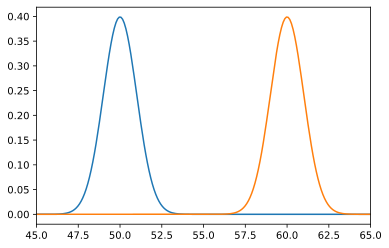

In [23]:
mu = 50
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(45,65)
plt.show()

Le due curve normali sono adesso completamente separate.

In [24]:
print (binom.ppf(0.95,1000,0.5))
print (binom.ppf(0.05,1000,0.6))

526.0
574.0


---

### Esercizio

Quali sono i nostri errori adesso?

---

In [25]:
print (1-binom.cdf(550, 1000, 0.5))
print (binom.cdf(550, 1000, 0.6))

0.0006958707972113398
0.0007412028990062971


**Con un cutoff di 550, entrambi i nostri errori scendono sotto lo 0.1%**

---
### Machine Learning Foundation (C) 2020 IBM Corporation